Day 2

Application 1: Solving Equations

The following two equations seem similar, but equation 1 can be solved (for r) analytically (try it out!), but not equation 2! 

$$10 = 5\log{\frac{r}{10}}$$
$$10 = 5\log{\frac{r}{10}}+0.002r$$

We will use numerical methods to solve equation 2, more specifically, the iterative method.

In [7]:
# use iterative method to solve the problem 10=5log(r/10)+0.002r

import numpy as np
import matplotlib.pyplot as plt

# define the function
def f(r):
    return 10**(2-0.0004*r)*10

Rewrite the equation in the form of (try derive):
$$r=10×10^{2-0.0004r}$$
Then use 1000 as the initial value, run a 100 iteration

In [8]:
r = 1000
for i in range (20):
    r = f(r)
    print("Number of Iteration: ", i+1, " Value of r: ",  r)

Number of Iteration:  1  Value of r:  398.1071705534973
Number of Iteration:  2  Value of r:  693.0381335543425
Number of Iteration:  3  Value of r:  528.1833984276446
Number of Iteration:  4  Value of r:  614.7897817911412
Number of Iteration:  5  Value of r:  567.654502969976
Number of Iteration:  6  Value of r:  592.8409558305243
Number of Iteration:  7  Value of r:  579.2467658853818
Number of Iteration:  8  Value of r:  586.5449414464675
Number of Iteration:  9  Value of r:  582.6154851536324
Number of Iteration:  10  Value of r:  584.727885812272
Number of Iteration:  11  Value of r:  583.5913493623659
Number of Iteration:  12  Value of r:  584.2025660759019
Number of Iteration:  13  Value of r:  583.8737809787382
Number of Iteration:  14  Value of r:  584.0506177335104
Number of Iteration:  15  Value of r:  583.9554995961669
Number of Iteration:  16  Value of r:  584.006660451167
Number of Iteration:  17  Value of r:  583.9791421865931
Number of Iteration:  18  Value of r:  583.

Application 2: Monte Carlo Simulation

Let's use the numerical method to estimate the value of $\pi$.
https://medium.com/the-modern-scientist/estimating-pi-using-monte-carlo-methods-dbdf26c888d6#:~:text=Multiply%20the%20ratio%20by%204%20to%20estimate%20the,circle%2C%20we%20can%20estimate%20the%20value%20of%20pi.

In [9]:
# display image 
from IPython.display import Image
Image(url='https://demonstrations.wolfram.com/ApproximatingPiByTheMonteCarloMethod/img/popup_2.png')

In [10]:
# use monte carlo method to estimate pi
import numpy as np
import matplotlib.pyplot as plt

# define the function
def f(x,y):
    return x**2+y**2

# define the number of points
n = 100

# generate random points
x = np.random.rand(n)
y = np.random.rand(n)

# calculate the number of points in the circle
count = 0
for i in range(n):
    if f(x[i],y[i]) <= 1:
        count += 1

# calculate pi

pi = 4*count/n
print(pi)

3.08


Application 3: Malaysia Population

Exercise: Let's Examine Malaysia Population!

In [11]:
# get malaysia population data from kaggle website

# import pandas as pd
import pandas as pd
import wget

url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv'
populationfile = wget.download(url)
df = pd.read_csv(populationfile)
df.head()

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
0,Malaysia,0,32657100,23528200,3649000,3111400,3550500
1,Klang Valley,17,8417800,6181800,827600,719000,895100
2,Johor,1,3794200,2733400,445600,353900,409800
3,Kedah,2,2193600,1554800,282300,209700,254100
4,Kelantan,3,1928900,1258700,202100,211200,271700


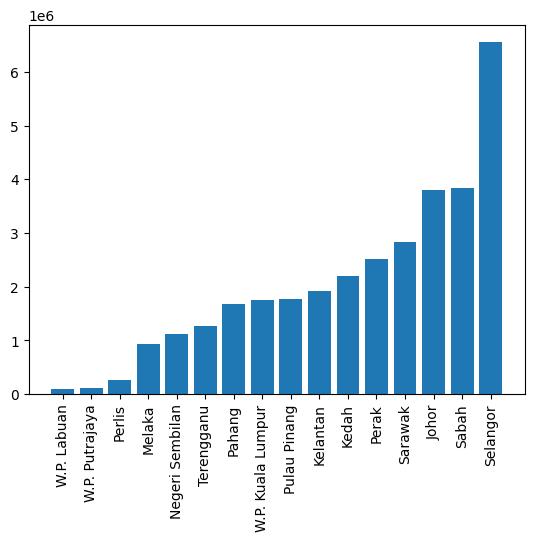

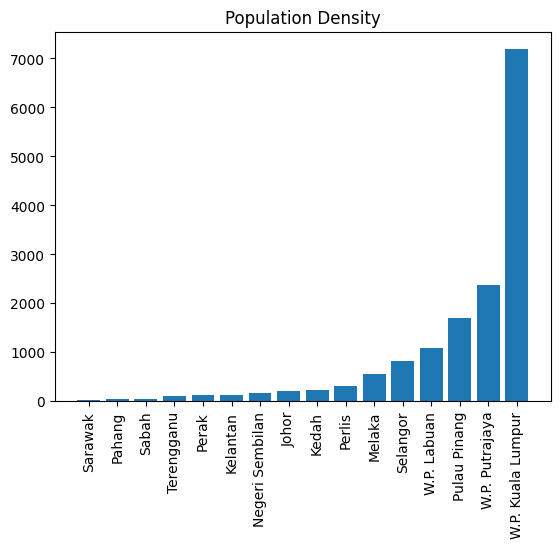

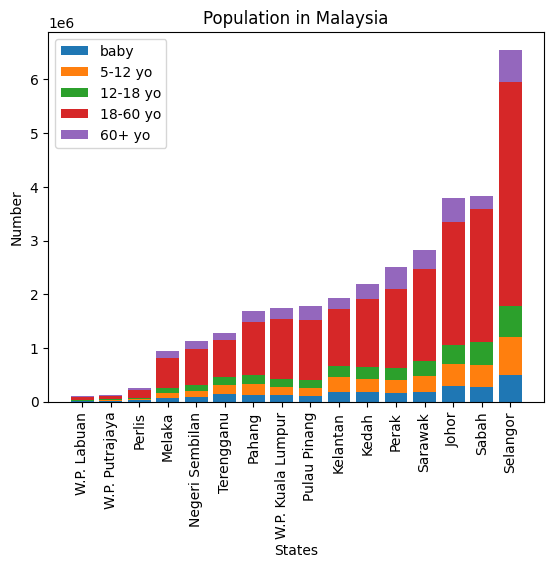

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

population_table = pd.read_csv('population.csv')
population_table.loc[0]

no_malaysia = population_table[population_table['state'] != 'Malaysia']
only_states = no_malaysia[no_malaysia['state']!='Klang Valley']
only_states
population_table[population_table['pop'] > 5000000]
sorted_table = only_states.sort_values(by=['pop'])
x = sorted_table['state']
y = sorted_table['pop']
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()
sorted_table['pop18to60'] = sorted_table['pop_18'] - sorted_table['pop_60']
sorted_table['pop_baby'] = sorted_table['pop'] - sorted_table['pop_18'] - sorted_table['pop_5'] - sorted_table['pop_12']
sorted_table
state_area = [92,49,819,1712,6658,12950,35965,243,1049,15040,9492,21146,124450,19166,73621,7951]
sorted_table['area_of_state'] = state_area
sorted_table['pop_dens'] = sorted_table['pop'] / sorted_table['area_of_state']
sorted_table
sort_pop_dens_table = sorted_table.sort_values(by=['pop_dens'])
x = sort_pop_dens_table['state']
y = sort_pop_dens_table['pop_dens']

plt.bar(x,y)
plt.xticks(rotation=90)
# plt.ylim(0,3000)
plt.title('Population Density')
plt.show()
x = sorted_table['state']
y_baby = sorted_table['pop_baby']
y_children = sorted_table['pop_5']
y_teenager = sorted_table['pop_12']
y_adults = sorted_table['pop18to60']
y_elderly = sorted_table['pop_60']

plt.bar(x,y_baby, label='baby')
plt.bar(x,y_children, label="5-12 yo", bottom=y_baby)
plt.bar(x,y_teenager, label="12-18 yo", bottom=y_baby+y_children)
plt.bar(x,y_adults, label="18-60 yo", bottom=y_baby+y_children+y_teenager)
plt.bar(x,y_elderly, label="60+ yo", bottom=y_baby+y_children+y_teenager+y_adults)


plt.xticks(rotation=90)
plt.legend()
plt.title('Population in Malaysia')
plt.ylabel("Number")
plt.xlabel("States")
plt.show()

Session 5: Conclusion and Next Steps - Review of what has been covered, and discussion of further resources and applications of Python in physics.